#**Facial Expression Recognition Ai**

##*Making SubDir cos The img didnt loading*

* Gpt Gen this code fucking crazy
i was about to upload again,,
that was like the first time i got like
 whoo thats what automate ....

In [ ]:
import os
import shutil

# Define your current directories

test_dir = '/content/sample_data/test'
train_dir = '/content/sample_data/images'


# Create subdirectories for the 'happy' class in both train and test directories
os.makedirs(os.path.join(train_dir, 'happy'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'happy'), exist_ok=True)

# Move all images from train_dir to the 'happy' subdirectory
for filename in os.listdir(train_dir):
    if filename.endswith(".jpg"):
        shutil.move(os.path.join(train_dir, filename), os.path.join(train_dir, 'happy', filename))

# Move all images from test_dir to the 'happy' subdirectory
for filename in os.listdir(test_dir):
    if filename.endswith(".jpg"):
        shutil.move(os.path.join(test_dir, filename), os.path.join(test_dir, 'happy', filename))


In [ ]:
# List files in the train/happy directory
print(os.listdir(os.path.join(train_dir, 'happy')))

# List files in the test/happy directory
print(os.listdir(os.path.join(test_dir, 'happy')))



['Training_2372163.jpg', 'Training_2260379.jpg', 'Training_2327362.jpg', 'Training_2438827.jpg', 'Training_2429948.jpg', 'Training_2293129.jpg', 'Training_2179000.jpg', 'Training_2131189.jpg', 'Training_2147874.jpg', 'Training_2300493.jpg', 'Training_2208115.jpg', 'Training_2354823.jpg', 'Training_2217644.jpg', 'Training_2432161.jpg', 'Training_2389682.jpg', 'Training_2126885.jpg', 'Training_2457089.jpg', 'Training_2402377.jpg', 'Training_2259595.jpg', 'Training_2420835.jpg', 'Training_2190921.jpg', 'Training_2292951.jpg', 'Training_2242032.jpg', 'Training_2470912.jpg']
['PrivateTest_2462458.jpg', 'PrivateTest_928647.jpg', 'PrivateTest_2632278.jpg', 'PrivateTest_2501190.jpg', 'PrivateTest_95094.jpg', 'PrivateTest_2028370.jpg', 'PrivateTest_258543.jpg', 'PrivateTest_2352334.jpg', 'PrivateTest_3362951.jpg', 'PrivateTest_2492326.jpg', 'PrivateTest_1735299.jpg', 'PrivateTest_3579299.jpg', 'PrivateTest_3402902.jpg', 'PrivateTest_1561788.jpg', 'PrivateTest_2390435.jpg', 'PrivateTest_834081.j

In [ ]:
import os

test_dir = '/content/sample_data/test/happy'
train_dir = '/content/sample_data/train/happy'

print(f"Training images: {len(os.listdir(train_dir))}")
print(f"Testing images: {len(os.listdir(test_dir))}")


Training images: 27
Testing images: 21


In [ ]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator



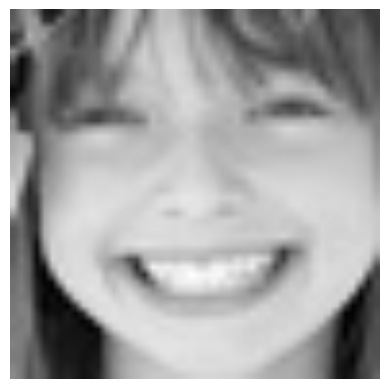

<Figure size 50x50 with 0 Axes>

In [ ]:
imgPth = '/content/sample_data/images/Training_2126885.jpg'
img = image.load_img(imgPth, target_size=(48, 48), color_mode='grayscale')
imgAry = image.img_to_array(img)
plt.imshow(imgAry.squeeze(), cmap='gray', interpolation='bilinear')
plt.axis('off')
plt.show()

#init Dir's

In [ ]:

testDir = '/content/sample_data/test/happy'
trainingDir = '/content/sample_data/train/happy'

print(len(testDir))
print(len(trainingDir))

31
32


#Loading Data

In [ ]:


# Create an ImageDataGenerator object for augmenting and preprocessing the images
trainDataGen = ImageDataGenerator(
    rescale=1./255,   # Rescale pixel values
    rotation_range=20, # Randomly rotate images
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

testDataGen = ImageDataGenerator(rescale=1./255) # Only rescale for test data



# Load the images from the train directory (point to '/train', not '/happy')
trainGen = trainDataGen.flow_from_directory(
    '/content/sample_data/train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale' # convert to grayScale
)

# Load the images from the test directory (point to '/test', not '/happy')
testGen = testDataGen.flow_from_directory(
    '/content/sample_data/test',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
     color_mode='grayscale' # convert to grayScale

)



Found 27 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


#Making The Model. Sequential

In [ ]:

model = keras.models.Sequential([
    keras.layers.Conv2D(
        32, (3,3), activation='relu', input_shape=(48, 48, 1)
    ),

    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(
        64, (3, 3), activation='relu'
    ),

    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(
        126, (3, 3), activation='relu'
    ),

    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(
        128, activation='relu'
    ),

    keras.layers.Dense(2, activation='softmax')


])


#Train The model --> epochs=10

In [ ]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

train = model.fit(
    trainGen,
    steps_per_epoch=trainGen.samples // trainGen.batch_size,
    validation_data=testGen,
    validation_steps=testGen.samples // testGen.batch_size,
    epochs=10
)


saveModel = 'facialExprsionRec.h5'
model.save(saveModel)
print(f'Model Save to ---> {saveModel}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.7261 - val_accuracy: 1.0000 - val_loss: 0.4656
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 1.0000 - loss: 0.5430 - val_accuracy: 1.0000 - val_loss: 0.2400
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 1.0000 - loss: 0.3764 - val_accuracy: 1.0000 - val_loss: 0.0766
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 1.0000 - loss: 0.2109 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 1.0000 - loss: 0.0942 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 1.0000 - loss: 0.0388 - val_accuracy: 1.0000 - val_loss: 1.0725e-04
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 1.0000 - loss: 0.0178 - val_accuracy: 1.0000 - val_loss: 5.8239e-06
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 2

Model Save to ---> facialExprsionRec.h5


#Predict Img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted Expression: happy (class index 1)


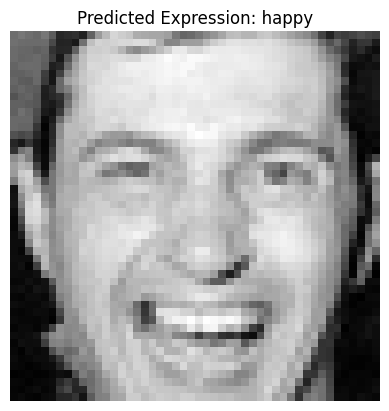

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('facialExprsionRec.h5')

# Load and preprocess the image
imgPath = '/content/sample_data/test/happy/PublicTest_97807894.jpg'
img = image.load_img(imgPath, target_size=(48, 48), color_mode='grayscale')
imgArray = image.img_to_array(img)  # Convert to array
imgArray /= 255.0  # Normalize pixel values
imgArray = np.expand_dims(imgArray, axis=0)  # Add batch dimension (1, 48, 48, 1)

predict = model.predict(imgArray)

predictClass = np.argmax(predict, axis=1)


# Display the prediction result
print(f'Predicted Expression: happy (class index {predictClass[0]})')
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Expression: happy')
plt.axis('off')
plt.show()